<a href="https://colab.research.google.com/github/myprogrammerpersonality/Microbiome-Modeling/blob/main/Microbiome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd

import scipy.integrate
import matplotlib.pyplot as plt

import panel as pn

import colorcet

pn.extension(comms='colab')

Row
    [0] Column
        [0] ParamFunction(function)
    [1] Column(width=150)
        [0] Spacer(height=80)
        [1] FloatSlider(end=100, name='input X', step=1, value=50)
        [2] Spacer(height=80)
        [3] FloatSlider(end=100, name='input Y', step=1, value=50)
        [4] Spacer(height=80)
        [5] FloatSlider(end=100, name='input Z', step=1, value=50)
        [6] Spacer(height=80)
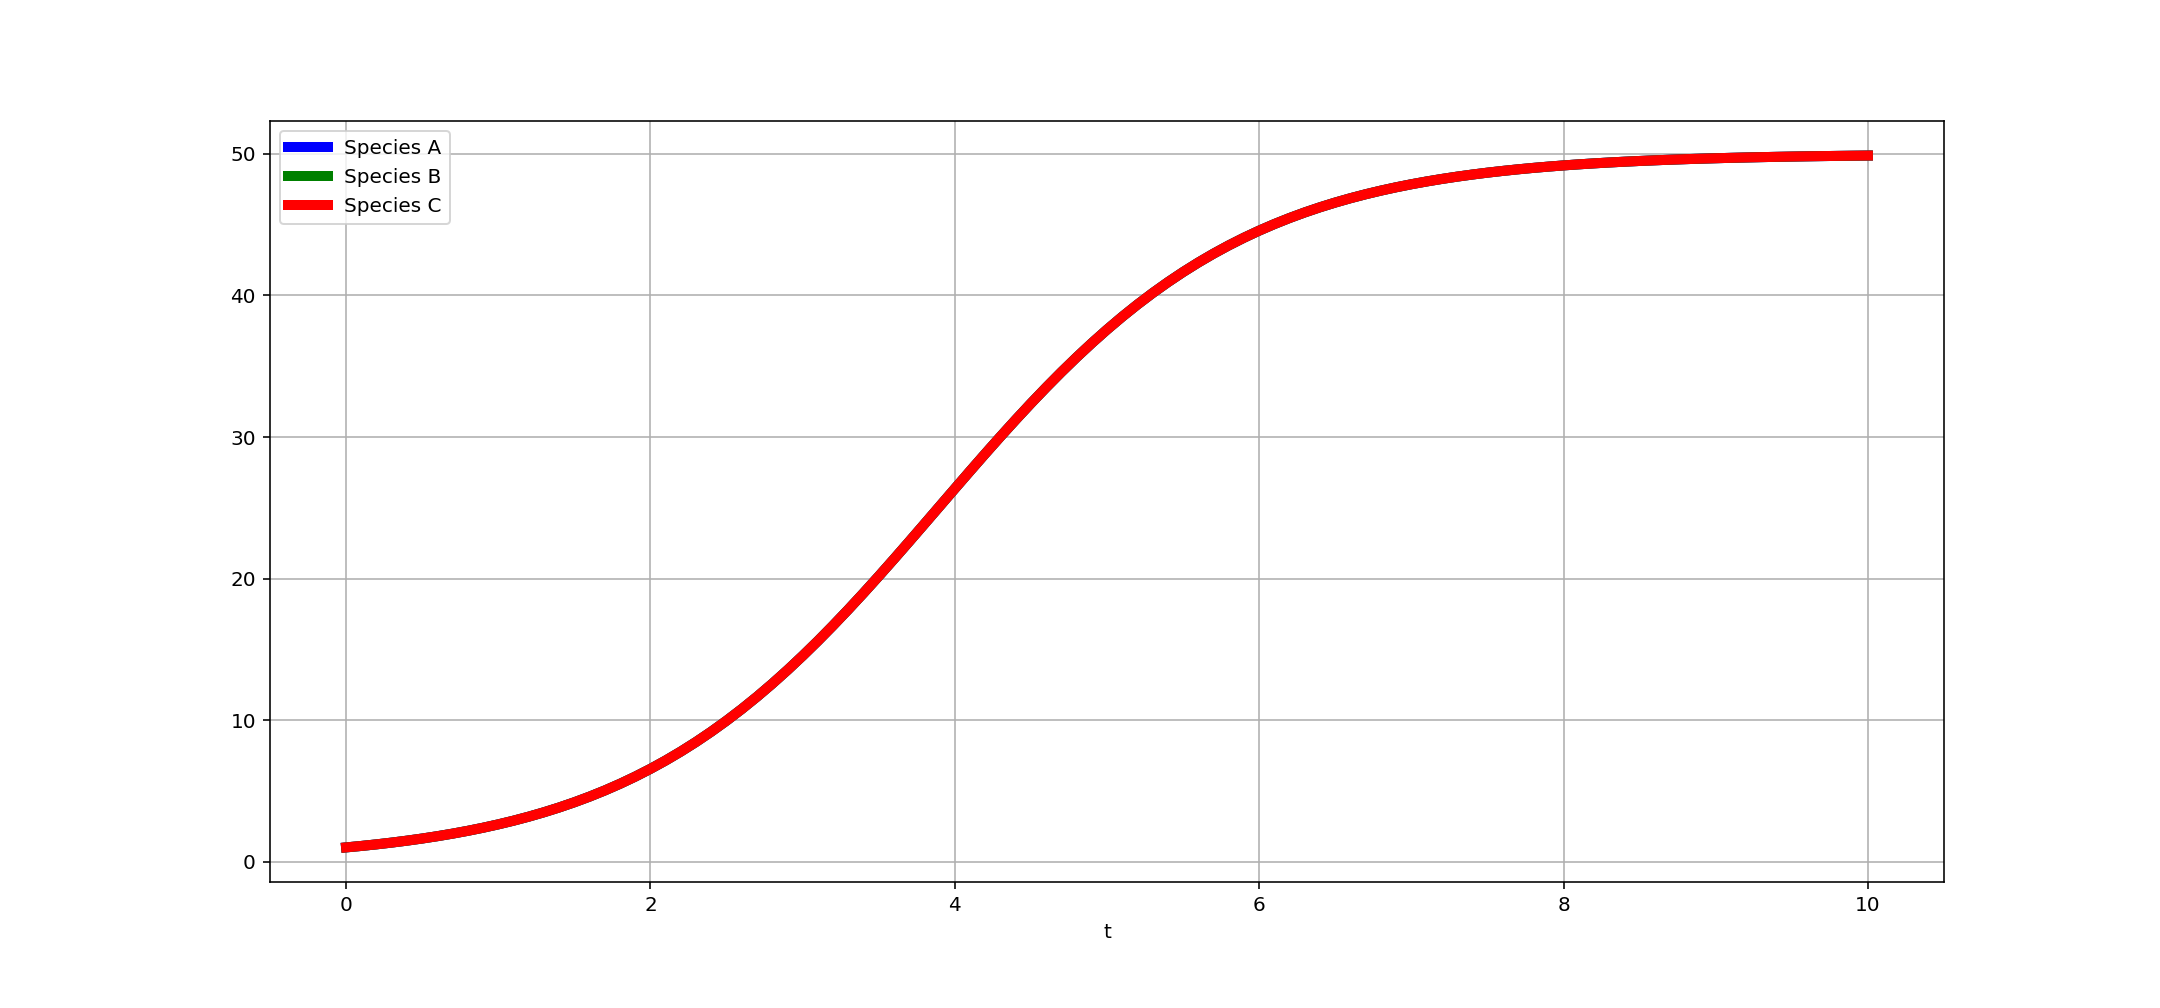

In [61]:
def compete_simple(y, t, input_X, input_Y, input_Z):
    species_A, species_B, species_C = y
    r_max = 1.0
    dydt = [r_max * (input_X - species_A) / input_X * species_A,
            r_max * (input_Y - species_B) / input_Y * species_B,
            r_max * (input_Z - species_C) / input_Z * species_C,]
    return dydt
    
X_slider =  pn.widgets.FloatSlider(name="input X", start=0, end=100, step=1, value=50)
Y_slider =  pn.widgets.FloatSlider(name="input Y", start=0, end=100, step=1, value=50)
Z_slider =  pn.widgets.FloatSlider(name="input Z", start=0, end=100, step=1, value=50)


@pn.depends(
    X_slider.param.value,
    Y_slider.param.value,
    Z_slider.param.value,
)

def simple_plot(input_X, input_Y, input_Z):
    consume_rate=10.0
    death_rate=1.0

    y0 = [1.0, 1.0, 1.0]
    t = np.linspace(0, 10, 101)

    sol = odeint(compete_simple, y0, t, args=(input_X, input_Y, input_Z))

    fig, ax = plt.subplots(figsize=(15, 7))
    plt.plot(t, sol[:, 0], 'b', label='Species A', linewidth=5)
    plt.plot(t, sol[:, 1], 'g', label='Species B', linewidth=5)
    plt.plot(t, sol[:, 2], 'r', label='Species C', linewidth=5)

    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.close(fig)
    
    return fig

# Final layout
widgets = pn.Column(pn.Spacer(height=80), X_slider, pn.Spacer(height=80), Y_slider, pn.Spacer(height=80), Z_slider, pn.Spacer(height=80), width=150)
pn.Row(pn.Column(simple_plot), widgets)

Row
    [0] Column
        [0] ParamFunction(function)
    [1] Spacer(width=20)
    [2] Column(width=150)
        [0] Spacer(height=150)
        [1] FloatSlider(end=100, name='input X', step=1, value=50)
        [2] Spacer(height=80)
        [3] FloatSlider(end=100, name='input Y', step=1, value=50)
        [4] Spacer(height=80)
        [5] FloatSlider(end=100, name='input Z', step=1, value=50)
        [6] Spacer(height=80)
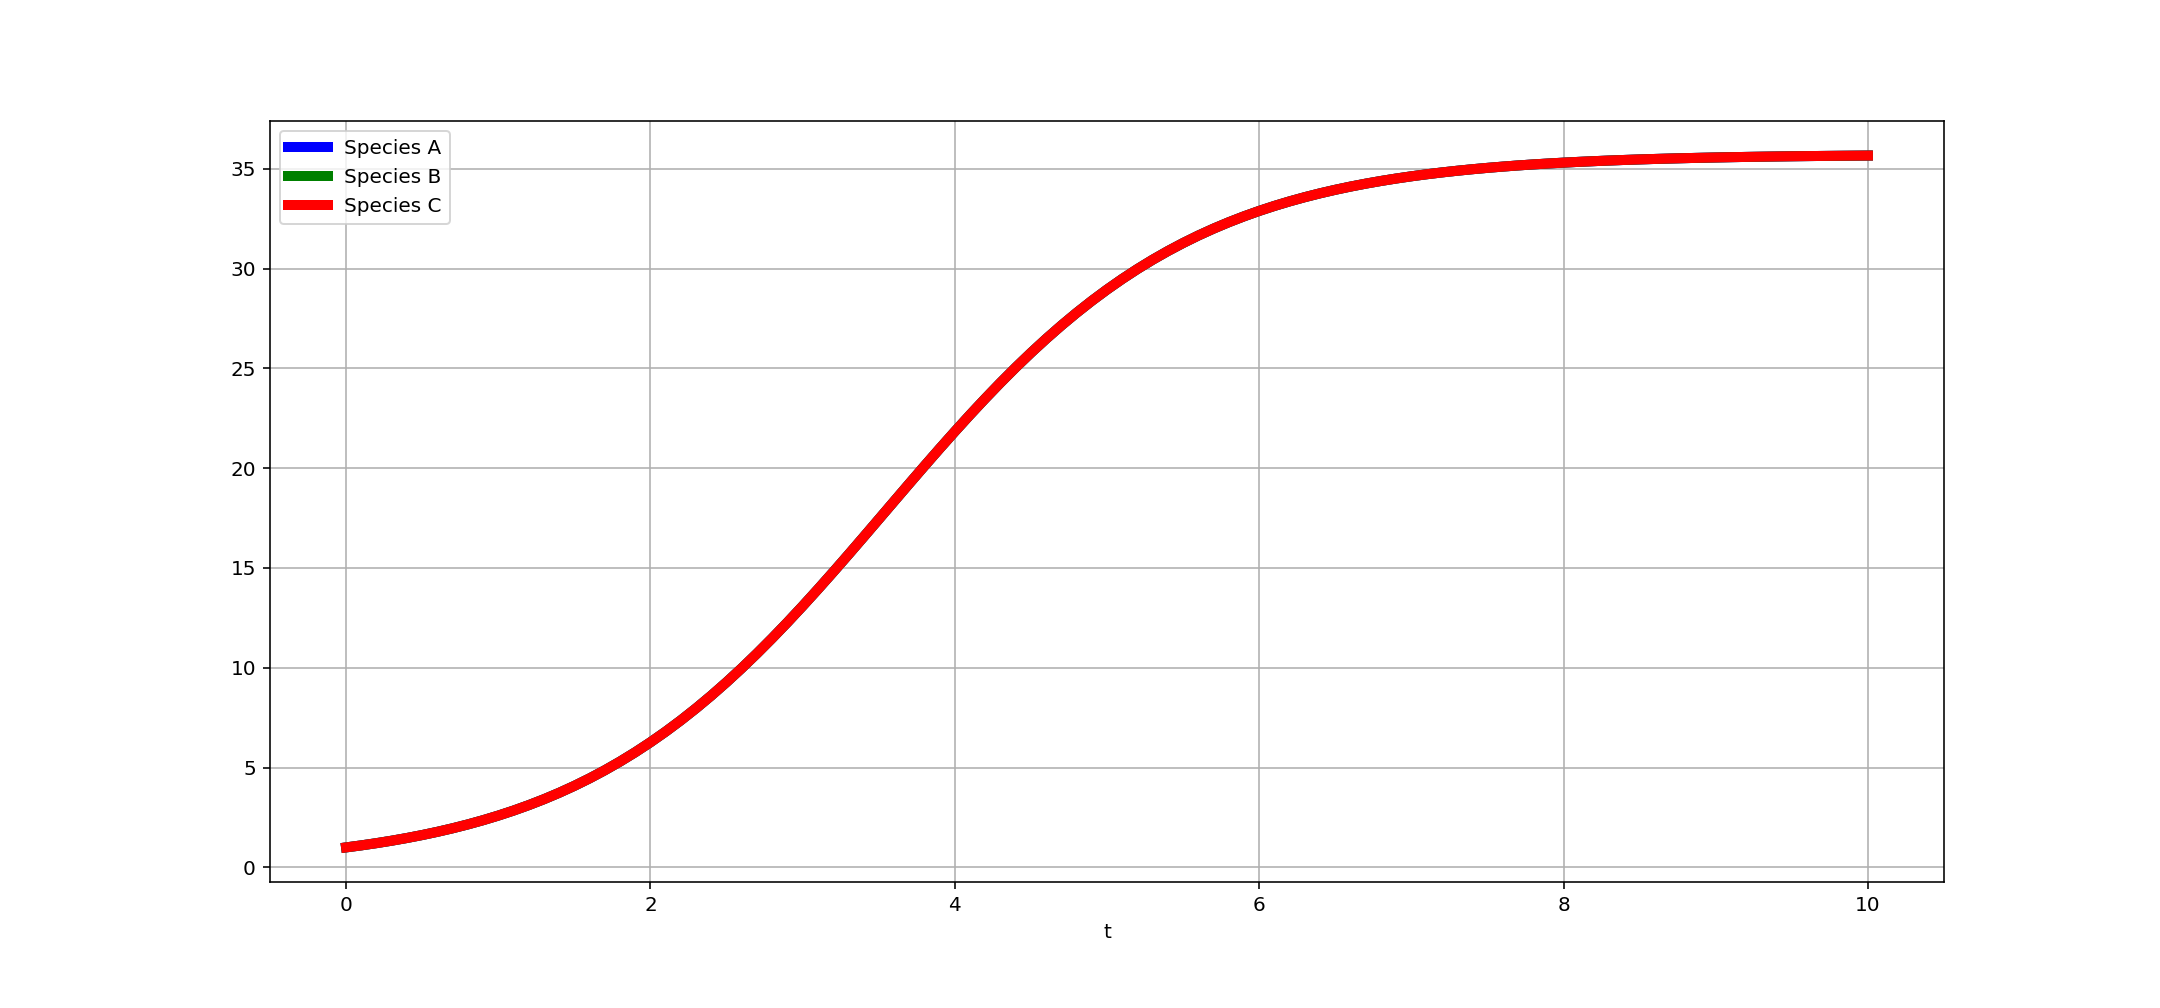

In [64]:
def compete_complex(y, t, consume_rate, death_rate, input_X, input_Y, input_Z, compete_rate=0.1):
    species_A, species_B, species_C = y
    r_max = 1.0
    compete_rate = 0.2
    dydt = [r_max * (input_X - species_A - compete_rate * (species_B + species_C)) / input_X * species_A,
            r_max * (input_Y - species_B - compete_rate * (species_A + species_C)) / input_Y * species_B,
            r_max * (input_Z - species_C - compete_rate * (species_A + species_B)) / input_Z * species_C,]
    return dydt

X_slider =  pn.widgets.FloatSlider(name="input X", start=0, end=100, step=1, value=50)
Y_slider =  pn.widgets.FloatSlider(name="input Y", start=0, end=100, step=1, value=50)
Z_slider =  pn.widgets.FloatSlider(name="input Z", start=0, end=100, step=1, value=50)


@pn.depends(
    X_slider.param.value,
    Y_slider.param.value,
    Z_slider.param.value,
)

def complex_plot(input_X, input_Y, input_Z):
    consume_rate=10.0
    death_rate=1.0

    y0 = [1.0, 1.0, 1.0]
    t = np.linspace(0, 10, 101)

    sol = odeint(compete_complex, y0, t, args=(consume_rate, death_rate, input_X, input_Y, input_Z))

    fig, ax = plt.subplots(figsize=(15, 7))
    plt.plot(t, sol[:, 0], 'b', label='Species A', linewidth=5)
    plt.plot(t, sol[:, 1], 'g', label='Species B', linewidth=5)
    plt.plot(t, sol[:, 2], 'r', label='Species C', linewidth=5)

    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.close(fig)
    
    return fig

# Final layout
widgets = pn.Column(pn.Spacer(height=150), X_slider, pn.Spacer(height=80), Y_slider, pn.Spacer(height=80), Z_slider, pn.Spacer(height=80), width=150)
pn.Row(pn.Column(complex_plot), pn.Spacer(width=20), widgets)